The E Coli Imbalanced Dataset

The dataset describes the problem of classifying E.coli proteins using their amino acid sequences in their cell localization sites. That is, predicting how a protein will bind to a cell based on the chemical composition of the protein before it is folded.

The dataset is credited to Kenta Nakai and was developed into its current form by Paul Horton and Kenta Nakai in their 1996 paper titled “A Probabilistic Classification System For Predicting The Cellular Localization Sites Of Proteins.” In it, they achieved a classification accuracy of 81%.

The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

Ignoring the sequence name, the input features are described as follows:

mcg: McGeoch’s method for signal sequence recognition.

gvh: von Heijne’s method for signal sequence recognition.

lip: von Heijne’s Signal Peptidase II consensus sequence score.

chg: Presence of charge on N-terminus of predicted lipoproteins.

aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.

alm1: score of the ALOM membrane-spanning region prediction program.

alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

There are eight classes described as follows:

cp: cytoplasm

im: inner membrane without signal sequence

pp: periplasm

imU: inner membrane, non cleavable signal sequence

om: outer membrane

omL: outer membrane lipoprotein

imL: inner membrane lipoprotein

imS: inner membrane, cleavable signal sequence



Load libraries

In [79]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load datasets

In [80]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ecoli.csv")
train.columns = ['mcg','gvh', 'lip','chg','aac','alm1','alm2', 'result']

In [81]:
train

,mcg,gvh,lip,chg,aac,alm1,alm2,result
0,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
...,...,...,...,...,...,...,...,...
330,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
331,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
332,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
333,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Check for null values

In [82]:
train.isnull().sum()

mcg       0
gvh       0
lip       0
chg       0
aac       0
alm1      0
alm2      0
result    0
dtype: int64

Compare result with independant variables

In [83]:
result = train.groupby(by=("result")).sum().reset_index()
result

,result,mcg,gvh,lip,chg,aac,alm1,alm2
0,cp,51.50,58.30,68.16,71.0,64.43,44.47,56.17
1,im,36.84,38.24,37.48,38.5,41.28,58.33,56.24
2,imL,1.45,0.94,2.00,1.5,0.91,1.29,1.14
3,imS,1.48,1.02,0.96,1.0,1.07,1.28,1.14
4,imU,25.41,16.06,17.32,17.5,19.56,26.04,26.18
5,om,13.45,14.20,10.12,10.0,14.78,9.25,6.11
6,omL,3.49,2.56,5.00,2.5,2.71,2.82,1.11
7,pp,33.91,36.39,24.96,26.0,22.71,24.34,19.47


Label Encode result

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     335 non-null    float64
 1   gvh     335 non-null    float64
 2   lip     335 non-null    float64
 3   chg     335 non-null    float64
 4   aac     335 non-null    float64
 5   alm1    335 non-null    float64
 6   alm2    335 non-null    float64
 7   result  335 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train.result = le.fit_transform(train.result)
train.result

0      0
1      0
2      0
3      0
4      0
      ..
330    7
331    7
332    7
333    7
334    7
Name: result, Length: 335, dtype: int64

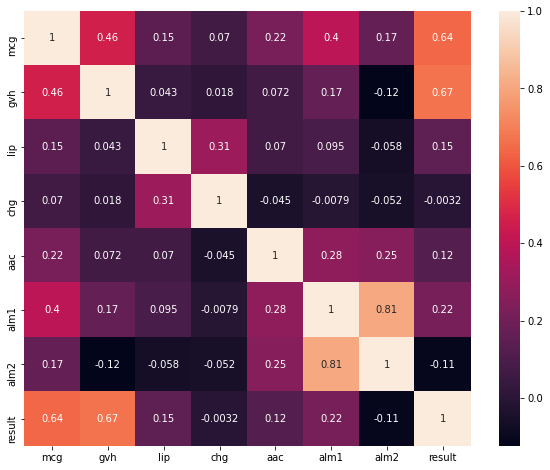

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

Count each class

In [87]:
import collections
from collections import Counter

counter = Counter(train.result)
for k,v in counter.items():
	per = v / len(train.result) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=142, Percentage=42.388%
Class=1, Count=77, Percentage=22.985%
Class=3, Count=2, Percentage=0.597%
Class=2, Count=2, Percentage=0.597%
Class=4, Count=35, Percentage=10.448%
Class=5, Count=20, Percentage=5.970%
Class=6, Count=5, Percentage=1.493%
Class=7, Count=52, Percentage=15.522%


In [88]:
result = train.groupby('result')['result'].count()
result/len(train)*100

result
0    42.388060
1    22.985075
2     0.597015
3     0.597015
4    10.447761
5     5.970149
6     1.492537
7    15.522388
Name: result, dtype: float64

In [89]:
result1=train.groupby("result").count().reset_index()
result1

,result,mcg,gvh,lip,chg,aac,alm1,alm2
0,0,142,142,142,142,142,142,142
1,1,77,77,77,77,77,77,77
2,2,2,2,2,2,2,2,2
3,3,2,2,2,2,2,2,2
4,4,35,35,35,35,35,35,35
5,5,20,20,20,20,20,20,20
6,6,5,5,5,5,5,5,5
7,7,52,52,52,52,52,52,52


Percentage of result

In [90]:
result2=train.groupby("result").count()/len(train)*100
result2

,mcg,gvh,lip,chg,aac,alm1,alm2
result,,,,,,,
0,42.388060,42.388060,42.388060,42.388060,42.388060,42.388060,42.388060
1,22.985075,22.985075,22.985075,22.985075,22.985075,22.985075,22.985075
2,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015
3,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015
4,10.447761,10.447761,10.447761,10.447761,10.447761,10.447761,10.447761
5,5.970149,5.970149,5.970149,5.970149,5.970149,5.970149,5.970149
6,1.492537,1.492537,1.492537,1.492537,1.492537,1.492537,1.492537
7,15.522388,15.522388,15.522388,15.522388,15.522388,15.522388,15.522388


Graphical representation of result

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


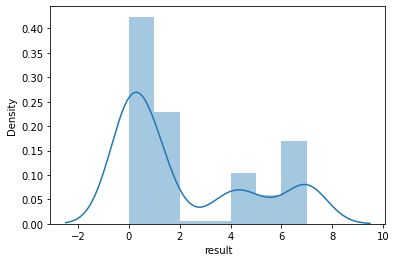

In [91]:
sns.distplot(train['result'])

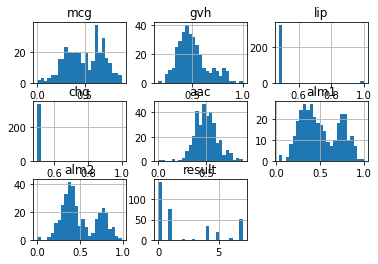

In [92]:
#create histograms of classes
# create histograms of all variables
from pandas import read_csv
from matplotlib import pyplot

# create a histogram plot of each variable
train.hist(bins=25)
# show the plot
pyplot.show()

Assign X and y variables

In [93]:
y = train.result
X = train.drop(['result'], axis = 1)

X.shape, y.shape

((335, 7), (335,))

Split training set up for training and validation

In [94]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.50, stratify=y)
#check shapes of testing data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((167, 7), (168, 7), (167,), (168,))

Scaler

In [95]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_val = scaler.transform(X_val)

Count values in validation set

In [96]:
from collections import Counter

print(Counter(y_val))

Counter({0: 71, 1: 39, 7: 26, 4: 18, 5: 10, 6: 2, 3: 1, 2: 1})


Class weights

In [97]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))) 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


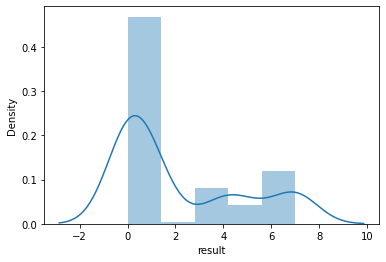

In [98]:
sns.distplot(y_val)

Define model

CatBoost

In [99]:
!pip install catboost

In [100]:
from catboost import CatBoostClassifier

ct_model = CatBoostClassifier(loss_function='MultiClass', class_weights= [.58, .77, .9, .99, .90, .94, .99, .84], iterations=300, depth=5, random_state=1).fit(X_train, y_train)
print(ct_model.score(X_train, y_train))

Learning rate set to 0.199763
0:	learn: 1.7309146	total: 1.9ms	remaining: 568ms
1:	learn: 1.4842680	total: 3.43ms	remaining: 511ms
2:	learn: 1.2768309	total: 4.78ms	remaining: 473ms
3:	learn: 1.1236396	total: 6.2ms	remaining: 459ms
4:	learn: 1.0204026	total: 7.63ms	remaining: 450ms
5:	learn: 0.9333688	total: 9.06ms	remaining: 444ms
6:	learn: 0.8667159	total: 10.5ms	remaining: 439ms
7:	learn: 0.8033225	total: 11.9ms	remaining: 434ms
8:	learn: 0.7541111	total: 13.3ms	remaining: 431ms
9:	learn: 0.7186030	total: 14.7ms	remaining: 427ms
10:	learn: 0.6796510	total: 16.1ms	remaining: 423ms
11:	learn: 0.6437524	total: 17.5ms	remaining: 419ms
12:	learn: 0.6172752	total: 18.9ms	remaining: 416ms
13:	learn: 0.5896271	total: 20.3ms	remaining: 414ms
14:	learn: 0.5622365	total: 21.7ms	remaining: 412ms
15:	learn: 0.5445196	total: 23.1ms	remaining: 409ms
16:	learn: 0.5262694	total: 24.5ms	remaining: 407ms
17:	learn: 0.5113435	total: 26.6ms	remaining: 417ms
18:	learn: 0.4934563	total: 28.1ms	remaining: 

In [101]:
ct_pred = bc_model.predict(X_val)
print(ct_model.score(X_val, y_val))

0.8809523809523809


In [102]:
print(Counter(bc_pred))

Counter({0: 73, 1: 38, 6: 26, 3: 17, 4: 11, 5: 2, 2: 1})


In [103]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, ct_pred)

array([[71,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 31,  0,  4,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0, 13,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  1,  1,  0,  0,  0, 24,  0]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


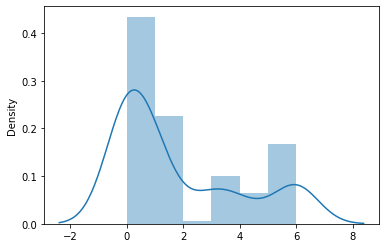

In [104]:
sns.distplot(bc_pred)

In [105]:
import collections
from collections import Counter

counter = Counter(ct_pred)
for k,v in counter.items():
	per = v / len(ct_pred) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=6, Count=26, Percentage=15.476%
Class=0, Count=73, Percentage=43.452%
Class=1, Count=38, Percentage=22.619%
Class=5, Count=2, Percentage=1.190%
Class=3, Count=17, Percentage=10.119%
Class=4, Count=11, Percentage=6.548%
Class=2, Count=1, Percentage=0.595%


Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=500, max_depth=10, random_state=1).fit(X_train, y_train)
print(rf_model.score(X_train, y_train))

1.0


In [107]:
rf_pred = bc_model.predict(X_val)
print(rf_model.score(X_val, y_val))

0.8571428571428571


In [108]:
print(Counter(rf_pred))

Counter({0: 73, 1: 38, 6: 26, 3: 17, 4: 11, 5: 2, 2: 1})


In [109]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, rf_pred)

array([[71,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 31,  0,  4,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0, 13,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  1,  1,  0,  0,  0, 24,  0]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


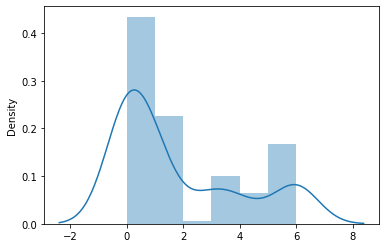

In [110]:
sns.distplot(rf_pred)

In [111]:
import collections
from collections import Counter

counter = Counter(rf_pred)
for k,v in counter.items():
	per = v / len(rf_pred) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=6, Count=26, Percentage=15.476%
Class=0, Count=73, Percentage=43.452%
Class=1, Count=38, Percentage=22.619%
Class=5, Count=2, Percentage=1.190%
Class=3, Count=17, Percentage=10.119%
Class=4, Count=11, Percentage=6.548%
Class=2, Count=1, Percentage=0.595%
